# **Predicting Wine Quality Through Classification and Regression**
#### DSCI 100 Winter T2 Group 006-042

## Introduction:

[insert introduction here]

## Preliminary Exploratory Data Analysis:

In [51]:
# loading libraries
library(tidyverse)
library(tidymodels)
library(gridExtra)

#### Attribute (units):
- Fixed acidity ($g/dm^3$)
- Volatile acidity ($g/dm^3$)
- Citric acid ($g/dm^3$)
- Residual sugar ($g/dm^3$)
- Chlorides ($g/dm^3$)
- Free sulfur dioxide ($mg/dm^3$)
- Total sulfur dioxide ($mg/dm^3$)
- Density ($g/cm^3$)
- pH
- Sulphates ($g/dm^3$)
- Alcohol ($vol.\%$)

In [52]:
# reading data
data <- read_csv("data/wine_quality.csv") %>%
        subset(select = -Id)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



In [53]:
# cleaning and wrangling data
colnames(data) <- gsub(" ", "_", names(data))
colnames(data)[colnames(data) %in% c("free_sulfur_dioxide", "total_sulfur_dioxide")] <- c("free_so2", "total_so2")

clean_data <- data %>%
              mutate(quality = quality - 2) %>%
              mutate(quality = as_factor(quality)) %>%
              subset(select = -c(fixed_acidity, volatile_acidity, citric_acid, free_so2))

In [54]:
# splitting data
clean_data_split <- initial_split(clean_data, prop = 0.5, strata = quality)
train_data <- training(clean_data_split)
test_data <- testing(clean_data_split)

In [55]:
glimpse(train_data)

Rows: 572
Columns: 8
$ residual_sugar <dbl> 1.9, 2.6, 2.3, 1.9, 1.8, 1.6, 2.0, 1.8, 1.6, 1.8, 2.3,…
$ chlorides      <dbl> 0.076, 0.098, 0.092, 0.076, 0.075, 0.069, 0.073, 0.097…
$ total_so2      <dbl> 34, 67, 54, 34, 40, 59, 18, 65, 29, 56, 71, 67, 23, 16…
$ density        <dbl> 0.9978, 0.9968, 0.9970, 0.9978, 0.9978, 0.9964, 0.9968…
$ pH             <dbl> 3.51, 3.20, 3.26, 3.51, 3.51, 3.30, 3.36, 3.28, 3.26, …
$ sulphates      <dbl> 0.56, 0.68, 0.65, 0.56, 0.56, 0.46, 0.57, 0.54, 1.56, …
$ alcohol        <dbl> 9.4, 9.8, 9.8, 9.4, 9.4, 9.4, 9.5, 9.2, 9.1, 9.2, 9.7,…
$ quality        <fct> 3, 3, 3, 3, 3, 3, 5, 3, 3, 4, 3, 3, 3, 4, 3, 3, 5, 3, …


In [70]:
# summarizing data
train_data_mean_summary <- train_data %>%
                           select(-quality) %>%
                           map_dfr(mean, na.rm = TRUE)
colnames(train_data_mean_summary) <- paste("mean", colnames(train_data_mean_summary), sep = "_")

train_data_quality_summary <- train_data %>%
                              group_by(quality) %>%
                              summarize(count = n(),
                                        proportion = n() / nrow(train_data) * 100)

`summarise()` ungrouping output (override with `.groups` argument)



In [71]:
# mean of predictor variables
train_data_mean_summary

mean_residual_sugar,mean_chlorides,mean_total_so2,mean_density,mean_pH,mean_sulphates,mean_alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.470629,0.08555594,46.1792,0.9967039,3.309458,0.6559091,10.46582


In [72]:
# number of observations for each class
train_data_quality_summary

quality,count,proportion
<fct>,<int>,<dbl>
1,2,0.3496503
2,16,2.7972028
3,239,41.7832168
4,234,40.9090909
5,73,12.7622378
6,8,1.3986014


In [73]:
# scaling data
train_data_scaled <- train_data %>%
                     mutate_at(vars(-quality),
                               ~(scale(., center = TRUE) %>% as.vector))

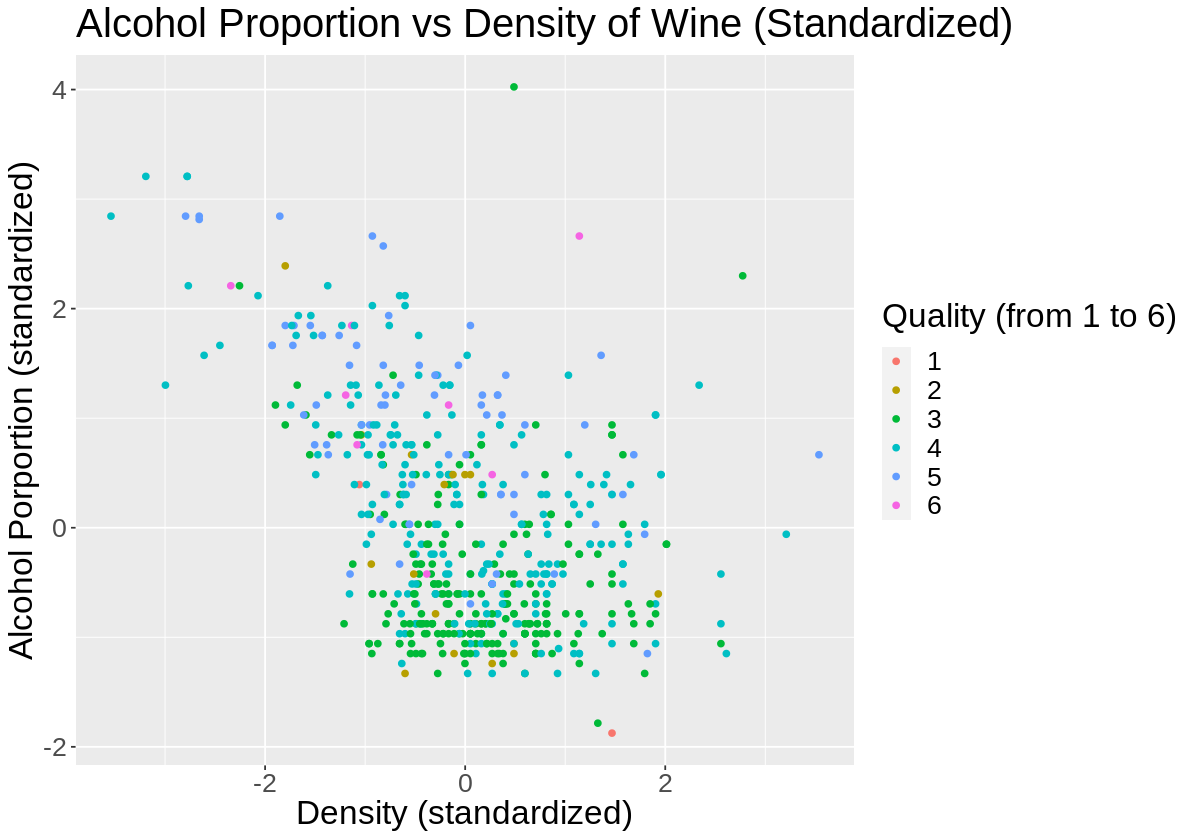

In [74]:
# visualizing data
options(repr.plot.width = 10, options.repr.plot.height = 15)

train_plot <- train_data_scaled %>%
                ggplot(aes(x = density , y = alcohol , color = quality)) +
                geom_point() +
                labs(x = "Density (standardized)" , y = "Alcohol Porportion (standardized)" , color = "Quality (from 1 to 6)") + 
                ggtitle("Alcohol Proportion vs Density of Wine (Standardized)") +
                theme(text = element_text(size = 20))
train_plot

## Methods:

[insert methods here]

## Expected Outcomes and Significance:

[insert expected outcomes and significance here]